In [475]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import f_regression

In [476]:
madden_df = pd.read_csv('data2023/actualmaddenratings.csv')
madden_df.head()

,#,Team,Position,Archetype,Jersey #,Unnamed: 5,Last Name,Age,Height,Weight,...,Years Pro,Handedness,College,Portrait ID,Team ID,Primary Key,Full Name,Player Asset,Iteration,Status
0,1,Packers,WR,WR_RouteRunner,17,Davante,Adams,28,73,215,...,7,Right,Fresno State,6328,20,10823,Davante Adams,AdamsDavante_10823,launch-ratings,published
1,2,Chiefs,QB,QB_Improviser,15,Patrick,Mahomes,25,75,230,...,4,Right,Texas Tech,8648,9,12635,Patrick Mahomes,MahomesIIPatrick_12635,launch-ratings,published
2,3,Chiefs,TE,TE_VerticalThreat,87,Travis,Kelce,31,77,260,...,8,Right,Cincinnati,5920,9,890,Travis Kelce,KelceTravis_890,launch-ratings,published
3,4,Rams,RE,DE_PowerRusher,99,Aaron,Donald,30,73,280,...,7,Right,Pittsburgh,6394,24,10852,Aaron Donald,DonaldAaron_10852,launch-ratings,published
4,5,Rams,CB,CB_MantoMan,5,Jalen,Ramsey,26,73,208,...,5,Right,Florida State,8185,24,17538,Jalen Ramsey,RamseyJalen_17538,launch-ratings,published


In [477]:
madden_df.columns

Index(['#', 'Team', 'Position', 'Archetype', 'Jersey #', 'Unnamed: 5',
       'Last Name', 'Age', 'Height', 'Weight', 'Overall', 'Speed',
       'Acceleration', 'Agility', 'Change of Dir', 'Strength', 'Jumping',
       'Awareness', 'Carrying', 'Break Tackle', 'Juke Move', 'Spin Move',
       'Trucking', 'Stiff Arm', 'BC Vision', 'Catching', 'Catch In Traffic',
       'Spec Catch', 'Release', 'Short RR', 'Medium RR', 'Deep RR',
       'Throw Power', 'Throw Acc Short', 'Throw Acc Mid', 'Throw Acc Deep',
       'Throw Under Pressure', 'Throw On The Run', 'Play Action', 'Break Sack',
       'Run Block', 'Run Block Power', 'Run Block Finesse', 'Pass Block',
       'Pass Block Power', 'Pass Block Finesse', 'Impact Blocking',
       'Lead Blocking', 'Tackle', 'Hit Power', 'Pursuit', 'Man Coverage',
       'Zone Coverage', 'Press', 'Play Recognition', 'Power Moves',
       'Finesse Moves', 'Block Shedding', 'Kick Power', 'Kick Accuracy',
       'Kick Return', 'Stamina', 'Injury', 'Toughness', 

### Keeping non-categorical columns that make sense

In [478]:
feature_columns = ['Position', 'Age', 'Height', 'Weight', 'Overall', 'Speed',
 'Acceleration', 'Agility', 'Change of Dir', 'Strength', 'Jumping',
 'Awareness', 'Carrying', 'Break Tackle', 'Juke Move', 'Spin Move',
 'Trucking', 'Stiff Arm', 'BC Vision', 'Catching', 'Catch In Traffic',
 'Spec Catch', 'Release', 'Short RR', 'Medium RR', 'Deep RR',
 'Throw Power', 'Throw Acc Short', 'Throw Acc Mid', 'Throw Acc Deep',
 'Throw Under Pressure', 'Throw On The Run', 'Play Action', 'Break Sack',
 'Run Block', 'Run Block Power', 'Run Block Finesse', 'Pass Block',
 'Pass Block Power', 'Pass Block Finesse', 'Impact Blocking',
 'Lead Blocking', 'Tackle', 'Hit Power', 'Pursuit', 'Man Coverage',
 'Zone Coverage', 'Press', 'Play Recognition', 'Power Moves',
 'Finesse Moves', 'Block Shedding', 'Kick Power', 'Kick Accuracy',
 'Kick Return', 'Stamina', 'Injury', 'Toughness', 'Years Pro']

feature_df = madden_df.drop(madden_df.columns.difference(feature_columns), axis='columns')
feature_df

,Position,Age,Height,Weight,Overall,Speed,Acceleration,Agility,Change of Dir,Strength,...,Power Moves,Finesse Moves,Block Shedding,Kick Power,Kick Accuracy,Kick Return,Stamina,Injury,Toughness,Years Pro
0,WR,28,73,215,99,91,92,92,92,63,...,10,10,52,25,30,45,96,93,88,7
1,QB,25,75,230,99,81,87,88,87,70,...,10,10,24,20,10,10,96,95,96,4
2,TE,31,77,260,99,86,89,86,75,79,...,20,20,40,35,32,6,97,89,91,8
3,RE,30,73,280,99,82,90,86,68,99,...,99,97,97,25,21,10,87,98,93,7
4,CB,26,73,208,99,92,94,91,92,71,...,35,41,50,18,17,80,91,86,86,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2075,RE,26,74,296,59,73,81,56,52,84,...,60,68,60,17,14,9,72,81,83,3
2076,TE,24,76,257,59,74,84,74,68,76,...,10,10,32,15,12,30,81,87,79,1
2077,FS,25,73,188,58,86,90,90,89,55,...,33,42,48,15,11,53,89,83,77,3
2078,CB,22,70,203,58,88,87,85,80,64,...,39,46,48,10,11,50,88,84,79,0


In [479]:
position = feature_df['Position'].unique()[18]
positions = feature_df['Position'].unique()
positions


array(['WR', 'QB', 'TE', 'RE', 'CB', 'RG', 'HB', 'LOLB', 'LT', 'LG', 'SS',
       'LE', 'DT', 'MLB', 'C', 'FS', 'RT', 'K', 'FB', 'P', 'ROLB'],
      dtype=object)

In [480]:
players_df = feature_df.loc[feature_df['Position'] == position]
players_df

,Position,Age,Height,Weight,Overall,Speed,Acceleration,Agility,Change of Dir,Strength,...,Power Moves,Finesse Moves,Block Shedding,Kick Power,Kick Accuracy,Kick Return,Stamina,Injury,Toughness,Years Pro
132,FB,30,73,235,87,80,86,83,79,79,...,30,35,33,19,19,45,89,93,87,8
287,FB,27,75,300,81,71,82,74,64,90,...,74,66,72,17,17,9,86,84,90,4
424,FB,28,73,238,78,77,86,73,75,81,...,21,21,41,20,21,66,84,86,84,5
629,FB,25,73,240,75,77,84,72,78,76,...,30,35,35,56,37,32,86,89,87,2
785,FB,28,71,235,73,81,87,81,76,77,...,28,20,38,18,12,51,83,90,89,5
900,FB,25,72,233,72,87,91,83,80,75,...,39,33,44,20,20,10,86,88,83,2
963,FB,28,74,234,71,79,84,75,65,77,...,14,10,24,17,15,30,84,83,87,5
1049,FB,25,75,248,70,83,88,75,74,75,...,17,17,45,21,19,18,83,85,73,4
1069,FB,28,74,234,70,79,85,74,74,74,...,30,35,47,19,19,32,87,90,90,5
1088,FB,22,75,254,69,81,84,83,70,81,...,67,59,51,22,15,30,80,82,79,0


### Fitting to 6 components explains about 70% of the variance

In [481]:
pca = PCA(n_components=6)
pca.fit(players_df.drop(['Position'], axis='columns'))

PCA(n_components=6)

Text(0, 0.5, 'Cumulative explained variance')

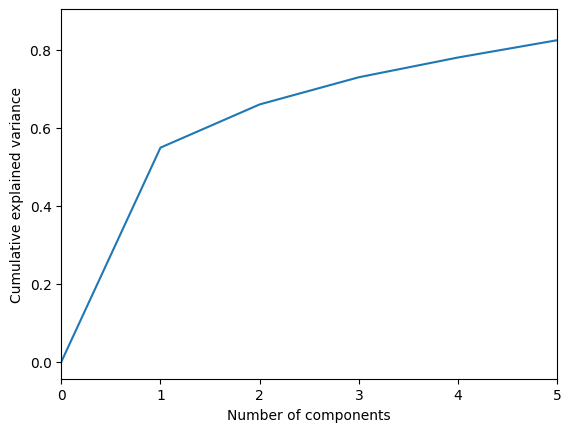

In [482]:
plt.plot(np.r_[[0],np.cumsum(pca.explained_variance_ratio_)])
plt.xlim(0, pca.n_components_ - 1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [483]:
components = pd.DataFrame(pca.components_, columns = players_df.drop(['Position'], axis='columns').columns, index=range(1, pca.n_components_ + 1))
components

,Age,Height,Weight,Overall,Speed,Acceleration,Agility,Change of Dir,Strength,Jumping,...,Power Moves,Finesse Moves,Block Shedding,Kick Power,Kick Accuracy,Kick Return,Stamina,Injury,Toughness,Years Pro
1,0.005462,0.001804,0.141540,-0.039463,-0.016725,-0.020812,0.031671,-0.022213,0.029218,-0.015672,...,0.352955,0.311623,0.215515,-0.017094,-0.006718,-0.160978,-0.013836,-0.013998,-0.013522,0.006541
2,0.008278,0.000204,0.162362,0.149343,-0.010748,0.004726,-0.013901,0.031153,0.075177,0.069021,...,0.203936,0.209907,0.018018,0.256234,0.149751,0.167693,0.051002,0.017825,0.106028,0.004409
3,-0.012511,-0.023774,-0.383328,-0.200998,0.012740,-0.031393,0.011790,0.029985,-0.144482,-0.087803,...,-0.161092,-0.062345,-0.110435,0.165072,0.049453,-0.235441,-0.036618,0.001739,-0.037089,-0.014448
4,0.072512,-0.024916,-0.151384,0.051390,-0.093167,-0.054502,-0.074001,-0.041836,0.078843,-0.045076,...,-0.004466,0.124040,-0.126706,-0.036025,0.041103,0.294099,-0.019561,0.065386,-0.026999,0.062127
5,0.001650,0.026880,0.497373,0.077708,-0.158141,-0.051274,-0.190569,-0.104368,0.100737,-0.067569,...,-0.200391,-0.248532,-0.079950,0.077468,0.025253,-0.212057,-0.041980,-0.109546,-0.022397,0.007254
6,0.094830,-0.027048,-0.184524,0.128363,-0.020785,-0.027163,0.071514,0.027402,-0.029338,0.042384,...,-0.208573,-0.094687,-0.170963,-0.045097,-0.021379,-0.052404,0.031262,0.035088,-0.010728,0.115189


### Takes the index of the component with the largest absolute 'Overall' value

In [484]:
print(components['Overall'])
component_index = components['Overall'].abs().argmax() + 1
component_index

1   -0.039463
2    0.149343
3   -0.200998
4    0.051390
5    0.077708
6    0.128363
Name: Overall, dtype: float64


3

### Print out the columns that correlate positively/negatively with positive/negative 'Overall' value

In [485]:
if components['Overall'][component_index] >= 0: 
    print('Positive influence:')
    print(components.loc[component_index].sort_values(ascending=False).head(10))
    print('Negative influence:')
    print(components.loc[component_index].sort_values(ascending=True).head(10))
elif components['Overall'][component_index] < 0: 
    print('Positive influence:')
    print(components.loc[component_index].sort_values(ascending=True).head(10))
    print('Negative influence:')
    print(components.loc[component_index].sort_values(ascending=False).head(10))

Positive influence:
Weight          -0.383328
Kick Return     -0.235441
Overall         -0.200998
Lead Blocking   -0.184343
Trucking        -0.176203
Stiff Arm       -0.174360
BC Vision       -0.165738
Power Moves     -0.161092
Break Tackle    -0.158685
Spin Move       -0.149296
Name: 3, dtype: float64
Negative influence:
Throw On The Run    0.281252
Throw Acc Deep      0.219105
Throw Acc Mid       0.208605
Throw Acc Short     0.202226
Play Action         0.181682
Kick Power          0.165072
Press               0.155169
Throw Power         0.144919
Man Coverage        0.093865
Zone Coverage       0.085129
Name: 3, dtype: float64


In [486]:
k_best = SelectKBest(mutual_info_regression, k=3).fit(players_df.drop(['Position', 'Overall'], axis='columns'), players_df['Overall'])
k_best.get_feature_names_out()

array(['Awareness', 'Carrying', 'Juke Move'], dtype=object)

## Gets ordered top 3 k best

In [487]:
k_best = SelectKBest(mutual_info_regression, k=1).fit(players_df.drop(['Position', 'Overall'], axis='columns'), players_df['Overall'])
print(k_best.get_feature_names_out())
k_best = SelectKBest(mutual_info_regression, k=2).fit(players_df.drop(['Position', 'Overall'], axis='columns'), players_df['Overall'])
print(k_best.get_feature_names_out())
k_best = SelectKBest(mutual_info_regression, k=3).fit(players_df.drop(['Position', 'Overall'], axis='columns'), players_df['Overall'])
print(k_best.get_feature_names_out())

['Juke Move']
['Carrying' 'Juke Move']
['Carrying' 'Juke Move' 'Deep RR']


In [488]:
k_best = SelectKBest(f_regression, k=1).fit(players_df.drop(['Position', 'Overall'], axis='columns'), players_df['Overall'])
print(k_best.get_feature_names_out())
k_best = SelectKBest(f_regression, k=2).fit(players_df.drop(['Position', 'Overall'], axis='columns'), players_df['Overall'])
print(k_best.get_feature_names_out())
k_best = SelectKBest(f_regression, k=3).fit(players_df.drop(['Position', 'Overall'], axis='columns'), players_df['Overall'])
print(k_best.get_feature_names_out())

['Lead Blocking']
['Run Block' 'Lead Blocking']
['Stiff Arm' 'Run Block' 'Lead Blocking']
